## Microsoft : Classifying Cybersecurity Incidents with Machine Learning

## Train Data

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Importing the train data 

In [2]:
traindata = pd.read_csv('new_train_sample.csv')
traindata=traindata.drop(columns=['Unnamed: 0'])

In [3]:
#displaying maximum columns and first five rows
pd.set_option('display.max_columns', None)
traindata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,TruePositive,NaN,NaN,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,97007,9177,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,BenignPositive,NaN,NaN,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,39978,114449,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
traindata.shape

(4758418, 45)

In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [6]:
null_summary = pd.DataFrame({
    'Null Count': traindata.isna().sum(),
    'Null Percentage': (traindata.isna().sum() / len(traindata)) * 100
})

print(null_summary)

                    Null Count  Null Percentage
Id                           0         0.000000
OrgId                        0         0.000000
IncidentId                   0         0.000000
AlertId                      0         0.000000
Timestamp                    0         0.000000
DetectorId                   0         0.000000
AlertTitle                   0         0.000000
Category                     0         0.000000
MitreTechniques        2733136        57.437913
IncidentGrade            25775         0.541672
ActionGrouped          4730205        99.407093
ActionGranular         4730205        99.407093
EntityType                   0         0.000000
EvidenceRole                 0         0.000000
DeviceId                     0         0.000000
Sha256                       0         0.000000
IpAddress                    0         0.000000
Url                          0         0.000000
AccountSid                   0         0.000000
AccountUpn                   0         0

#### deleting columns  which contain null values more than 50%

In [7]:
threshold= len(traindata)* 0.5   # removing 50% above null value
traindata = traindata.dropna(thresh=threshold,axis=1)

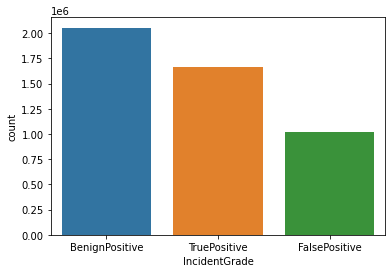

In [8]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=traindata)
plt.show()

In [9]:
# Count and percentage calculation for each unique value in 'IncidentGrade'
incident_grade_summary = traindata['IncidentGrade'].value_counts(normalize=True).mul(100).to_frame(name='Percentage')
incident_grade_summary['Count'] = traindata['IncidentGrade'].value_counts()

# Reset index to have 'IncidentGrade' as a column
incident_grade_summary = incident_grade_summary.reset_index().rename(columns={'index': 'IncidentGrade'})
print(incident_grade_summary)

    IncidentGrade  Percentage    Count
0  BenignPositive   43.417050  2054774
1    TruePositive   35.119636  1662087
2   FalsePositive   21.463313  1015782


In [10]:
# Dropping rows with null values in the 'IncidentGrade' column
traindata = traindata.dropna(subset=['IncidentGrade'])

In [11]:
# Check for any duplicate rows
duplicates = traindata[traindata.duplicated()]

# Display duplicate rows, if any
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 155243


In [12]:
traindata.drop_duplicates(inplace=True)

In [13]:
traindata.shape

(4577400, 35)

In [14]:
traindata.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [15]:
traindata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630
1,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630
4,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630


In [16]:
traindata.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06,4.577400e+06
mean,8.419716e+11,1.730889e+02,6.973234e+04,4.110693e+05,1.096099e+02,2.862698e+03,9.556584e+04,1.283791e+05,2.829348e+05,1.506187e+05,3.544669e+05,4.717130e+05,3.429710e+05,3.588808e+05,1.428748e+05,4.829440e+05,1.628050e+03,6.347218e+02,8.595315e+02,2.198992e+03,3.339762e+03,8.807908e+02,2.612549e+05,1.072358e+05,3.583357e+03,4.895628e+00,6.461704e+01,2.230627e+02,1.348427e+03,9.913553e+03
std,4.965472e+11,3.731760e+02,1.203110e+05,4.605476e+05,4.252050e+02,1.106618e+04,1.659709e+04,3.454983e+04,1.430936e+05,3.711049e+04,1.651846e+05,2.874341e+05,1.586342e+05,1.732754e+05,3.666529e+04,1.381830e+05,6.814881e+01,1.287077e+01,1.950382e+01,3.377066e+02,5.199114e+02,1.307672e+01,8.284195e+04,3.275077e+04,9.241788e+01,7.133100e-01,9.444711e+00,6.374760e+01,3.562757e+02,2.645918e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,9.000000e+00,4.630000e+02,2.135500e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,1.077420e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.200000e+01,9.215000e+03,2.218820e+05,9.000000e+00,1.300000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.610000e+02,8.201100e+04,6.850460e+05,4.600000e+01,1.950000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.129000e+03,5.997030e+05,1.721456e+06,9.522000e+03,1.131730e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [17]:
# Summary statistics for categorical features
categorical_features = ["Category", "EntityType", "EvidenceRole","IncidentGrade"]
print(traindata[categorical_features].describe())

             Category EntityType EvidenceRole   IncidentGrade
count         4577400    4577400      4577400         4577400
unique             20         31            2               3
top     InitialAccess         Ip      Related  BenignPositive
freq          1990165    1088602      2491054         1973943


In [18]:
traindata.nunique()

Id                     642342
OrgId                    5236
IncidentId             421530
AlertId               1150459
Timestamp              719084
DetectorId               7369
AlertTitle              74710
Category                   20
IncidentGrade               3
EntityType                 31
EvidenceRole                2
DeviceId                55204
Sha256                  73078
IpAddress              195384
Url                     85332
AccountSid             265788
AccountUpn             394186
AccountObjectId        257733
AccountName            272375
DeviceName              80956
NetworkMessageId       260032
RegistryKey               937
RegistryValueName         401
RegistryValueData         496
ApplicationId            1003
ApplicationName          1610
OAuthApplicationId        416
FileName               142641
FolderPath              59652
ResourceIdName           1497
OSFamily                    6
OSVersion                  48
CountryCode               212
State     

In [19]:
# Converting Timestamp to date time

traindata['Timestamp'] = pd.to_datetime(traindata['Timestamp'])

In [20]:
print(traindata['Timestamp'].dtype)

traindata['Timestamp'].head()

datetime64[ns, UTC]


0   2024-06-06 05:56:47+00:00
1   2024-06-03 10:45:09+00:00
2   2024-06-13 03:36:40+00:00
3   2024-06-08 16:54:57+00:00
4   2024-06-09 02:48:01+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [21]:
# Extracting Day, Month, Year, Hour and Time from Timestamp

traindata["Day"] = traindata["Timestamp"].dt.day
traindata["Month"] = traindata["Timestamp"].dt.month
traindata["Year"] = traindata["Timestamp"].dt.year
traindata["Hour"] = traindata["Timestamp"].dt.hour
traindata["Time"] = traindata["Timestamp"].dt.time

# dropping TimeStamp Column
#traindata.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column
traindata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,1709396985476,26,18583,687462,2024-06-06 05:56:47+00:00,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,6,6,2024,5,05:56:47
1,927712939180,33,5065,3990,2024-06-03 10:45:09+00:00,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,3,6,2024,10,10:45:09
2,1090921697002,201,150787,807590,2024-06-13 03:36:40+00:00,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,13,6,2024,3,03:36:40
3,1434519079555,204,108287,28575,2024-06-08 16:54:57+00:00,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,8,6,2024,16,16:54:57
4,1005022347708,54,528202,1458226,2024-06-09 02:48:01+00:00,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,9,6,2024,2,02:48:01


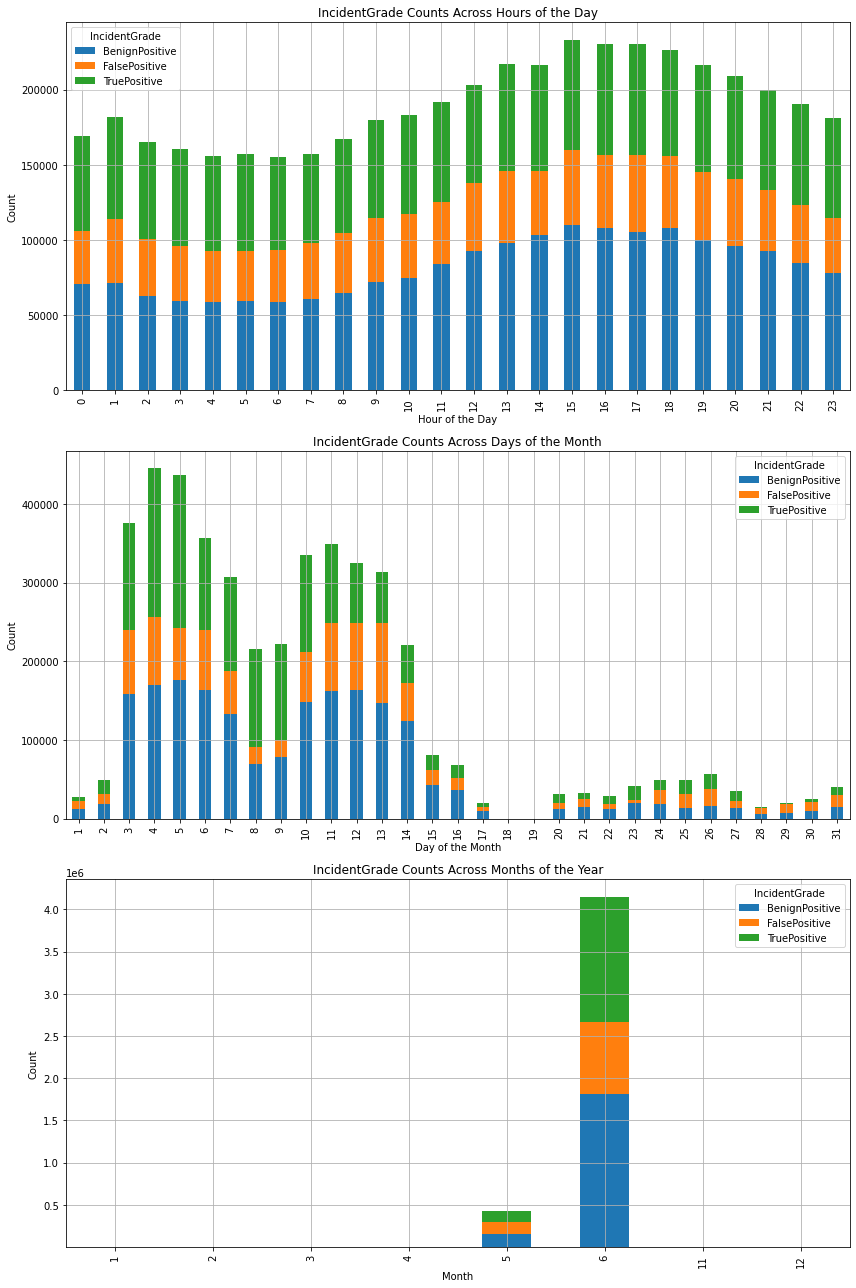

In [22]:
# Aggregate data
hour_incident_grade = traindata.groupby(['Hour', 'IncidentGrade']).size().unstack()
day_incident_grade = traindata.groupby(['Day', 'IncidentGrade']).size().unstack()
month_incident_grade = traindata.groupby(['Month', 'IncidentGrade']).size().unstack()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Hourly distribution (stacked bar plot)
hour_incident_grade.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("IncidentGrade Counts Across Hours of the Day")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Count")
axes[0].legend(title='IncidentGrade')
axes[0].grid(True)

# Daily distribution (stacked bar plot)
day_incident_grade.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("IncidentGrade Counts Across Days of the Month")
axes[1].set_xlabel("Day of the Month")
axes[1].set_ylabel("Count")
axes[1].legend(title='IncidentGrade')
axes[1].grid(True)

# Monthly distribution (stacked bar plot)
month_incident_grade.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title("IncidentGrade Counts Across Months of the Year")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Count")
axes[2].legend(title='IncidentGrade')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

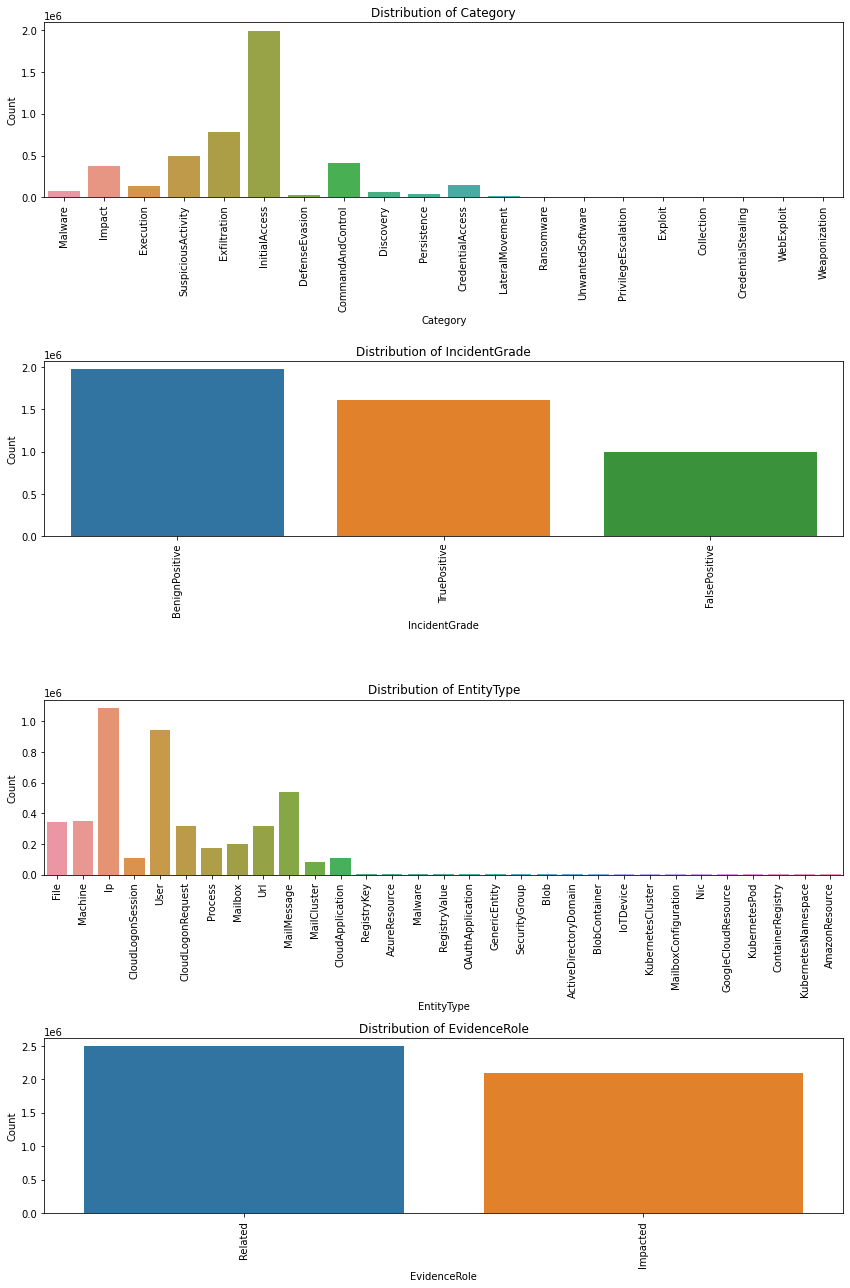

In [23]:
categorical_columns = ['Category', 'IncidentGrade', 'EntityType','EvidenceRole']

# Create subplots for each categorical column
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

# Plot each column as a count plot
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=traindata, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability if needed

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [24]:
numeric_columns = traindata.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')

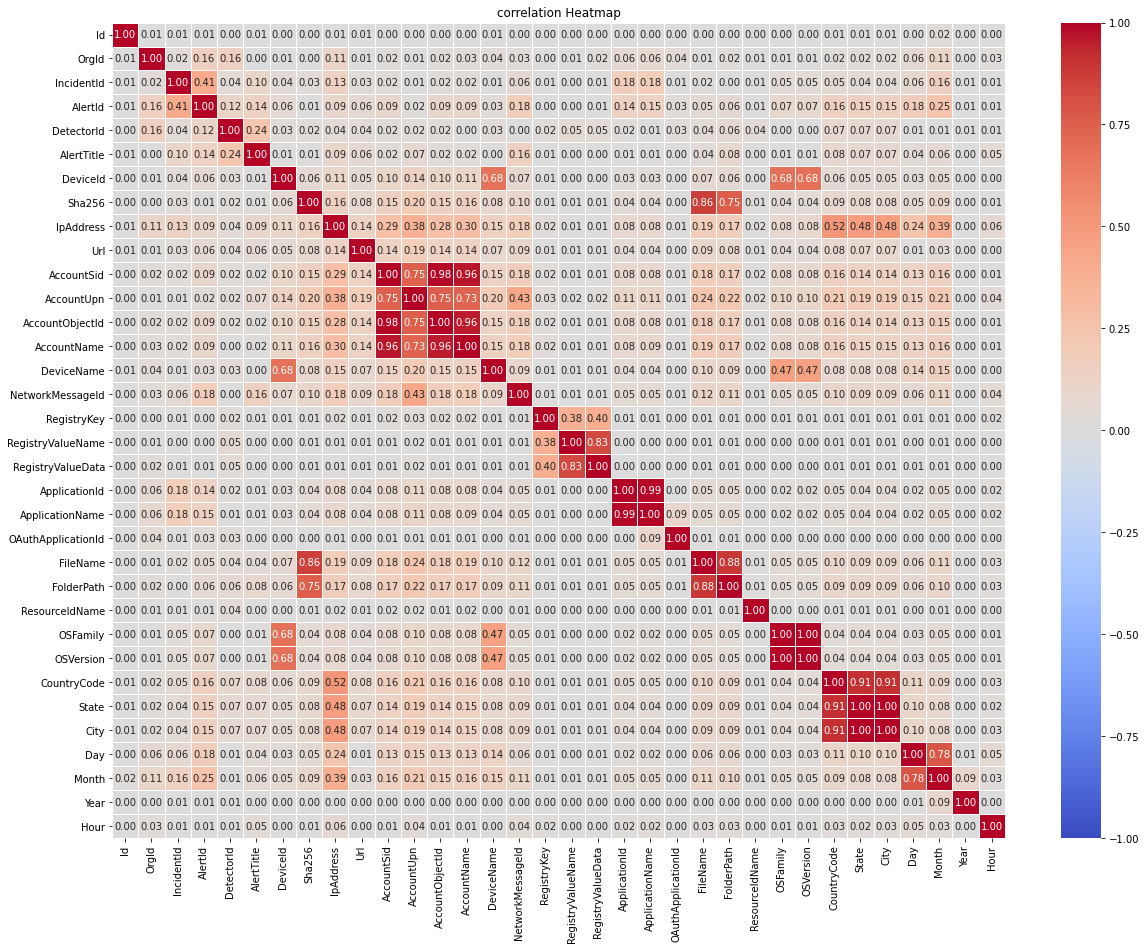

In [25]:
# selecting numerical col
numeric_df=traindata.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [26]:
# Dropping Highly Correlated Columns dropping columns correlated above 65% 
traindata.drop(["Sha256","AccountSid","AccountUpn","AccountObjectId","RegistryValueName","ApplicationId","FolderPath",
                "CountryCode","State","Month", "OSFamily", "DeviceId" ,"Timestamp"], axis =1 , inplace = True)


In [27]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577400 entries, 0 to 4758417
Data columns (total 27 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  IpAddress           int64 
 11  Url                 int64 
 12  AccountName         int64 
 13  DeviceName          int64 
 14  NetworkMessageId    int64 
 15  RegistryKey         int64 
 16  RegistryValueData   int64 
 17  ApplicationName     int64 
 18  OAuthApplicationId  int64 
 19  FileName            int64 
 20  ResourceIdName      int64 
 21  OSVersion           int64 
 22  City                int64 
 23  Day                 int32 
 24  Year                int32 
 25  Hour                int

In [28]:
traindata.shape

(4577400, 27)

In [29]:
# cheking the uique values in columns

columns = traindata.select_dtypes(include=['float64', 'int64','object']).columns

In [30]:
for col in columns:
    
    # Print the number of unique values in each column
    unique_count = traindata[col].nunique()  # Count unique values
    print(f"'{col}' : {unique_count}")

'Id' : 642342
'OrgId' : 5236
'IncidentId' : 421530
'AlertId' : 1150459
'DetectorId' : 7369
'AlertTitle' : 74710
'Category' : 20
'IncidentGrade' : 3
'EntityType' : 31
'EvidenceRole' : 2
'IpAddress' : 195384
'Url' : 85332
'AccountName' : 272375
'DeviceName' : 80956
'NetworkMessageId' : 260032
'RegistryKey' : 937
'RegistryValueData' : 496
'ApplicationName' : 1610
'OAuthApplicationId' : 416
'FileName' : 142641
'ResourceIdName' : 1497
'OSVersion' : 48
'City' : 7107
'Time' : 86400


In [31]:
# Encoding categorical variables

categorical = traindata.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder = LabelEncoder()
    traindata[feature] = encoder.fit_transform(traindata[feature])

traindata.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,1709396985476,26,18583,687462,31,813,12,0,9,1,360606,160396,453297,153085,529644,1631,860,3421,881,4132,3586,66,10630,6,2024,5,21407
1,927712939180,33,5065,3990,38,25,9,0,17,0,360606,160396,453297,3142,529644,1631,860,3421,881,289573,3586,66,10630,3,2024,10,38709
2,1090921697002,201,150787,807590,419,444,6,0,17,0,360606,160396,453297,4181,529644,1631,860,3421,881,289573,3586,66,10630,13,2024,3,13000
3,1434519079555,204,108287,28575,44,1233,16,2,9,1,360606,160396,453297,153085,529644,1631,860,3421,881,97007,3586,66,10630,8,2024,16,60897
4,1005022347708,54,528202,1458226,102,58829,7,0,9,0,360606,160396,453297,153085,529644,1631,860,3421,881,39978,3586,66,10630,9,2024,2,10081


In [32]:
traindata.to_csv('traindata_processed.csv', index=False)

## Test Data

In [33]:
#importing the test data 
testdata = pd.read_csv('GUIDE_Test.csv')

testdata.head()

<ipython-input-33-95498cf24cc3>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata = pd.read_csv('GUIDE_Test.csv')


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [34]:
testdata.shape

(4147992, 46)

In [35]:
testdata.drop_duplicates(inplace=True)

In [36]:
testdata.shape

(4147888, 46)

In [37]:
testdata.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307084
IncidentGrade               0
ActionGrouped         4145975
ActionGranular        4145975
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106182
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116518
FileName                    0
FolderPath

In [38]:
# Converting Timestamp to date time

testdata['Timestamp'] = pd.to_datetime(testdata['Timestamp'])

In [39]:
print(testdata['Timestamp'].dtype)

testdata['Timestamp'].head()

datetime64[ns, UTC]


0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [40]:
# Extracting Day, Month, Year, Hour and Time from Timestamp

testdata["Day"] = testdata["Timestamp"].dt.day
testdata["Month"] = testdata["Timestamp"].dt.month
testdata["Year"] = testdata["Timestamp"].dt.year
testdata["Hour"] = testdata["Timestamp"].dt.hour
testdata["Time"] = testdata["Timestamp"].dt.time

testdata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,2024-06-04 22:56:27+00:00,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2024-06-03 12:58:26+00:00,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2024-06-08 03:20:49+00:00,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,2024-06-12 12:07:31+00:00,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,2024-06-06 17:42:05+00:00,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public,6,6,2024,17,17:42:05


In [41]:
testdata.drop(["Sha256","AccountSid","AccountUpn","AccountObjectId","RegistryValueName","ApplicationId","FolderPath",
                "CountryCode","State","Month", "OSFamily", "DeviceId" ,"Timestamp",
               "MitreTechniques","ActionGrouped","ActionGranular","EmailClusterId","ThreatFamily","ResourceType","Roles",
                "AntispamDirection","SuspicionLevel","LastVerdict"], axis =1 , inplace = True)

In [42]:
testdata.drop('Usage',axis=1,inplace=True)

In [43]:
testdata.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,360606,160396,863,153085,529644,1631,860,3421,881,289573,3586,66,10630,4,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,360606,160396,453297,2833,529644,1631,860,3421,881,289573,3586,0,10630,3,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,360606,160396,453297,153085,529644,1631,860,3421,881,14,3586,66,10630,8,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,360606,160396,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,12,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,360606,160396,136104,153085,529644,1631,860,3421,881,289573,3586,66,10630,6,2024,17,17:42:05


In [44]:
testdata.dtypes

Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
IpAddress              int64
Url                    int64
AccountName            int64
DeviceName             int64
NetworkMessageId       int64
RegistryKey            int64
RegistryValueData      int64
ApplicationName        int64
OAuthApplicationId     int64
FileName               int64
ResourceIdName         int64
OSVersion              int64
City                   int64
Day                    int32
Year                   int32
Hour                   int32
Time                  object
dtype: object

In [45]:
# Encoding categorical variables of testdata

categorical = testdata.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder = LabelEncoder()
    testdata[feature] = encoder.fit_transform(testdata[feature])

testdata.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,360606,160396,863,153085,529644,1631,860,3421,881,289573,3586,66,10630,4,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,360606,160396,453297,2833,529644,1631,860,3421,881,289573,3586,0,10630,3,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,360606,160396,453297,153085,529644,1631,860,3421,881,14,3586,66,10630,8,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,360606,160396,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,12,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,360606,160396,136104,153085,529644,1631,860,3421,881,289573,3586,66,10630,6,2024,17,63665


In [46]:
testdata.to_csv('testdata_processed.csv', index=False)